In [3]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

plt.style.use('./deeplearning.mplstyle')

In [4]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

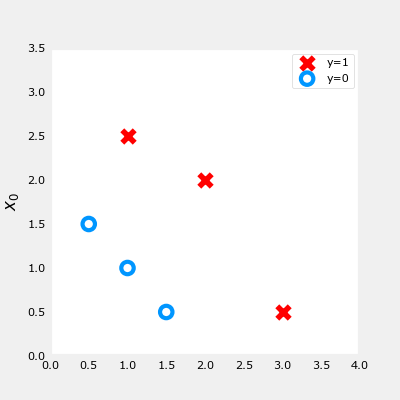

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel("$x_1$", fontsize=12)
ax.set_ylabel("$x_0$", fontsize=12)
plt.show()


In [6]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))  #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)  #(n,)(n,)=scalar
        err_i = f_wb_i - y[i]  #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]  #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m  #(n,)
    dj_db = dj_db / m  #scalar

    return dj_db, dj_dw


In [7]:
X_tmp = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2., 3.])
b_tmp = 1.
dj_db_t, dj_dw_t = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db={dj_db_t}")
print(f"dj_dw={dj_dw_t.tolist()}")


dj_db=0.49861806546328574
dj_dw=[0.498333393278696, 0.49883942983996693]


In [8]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"iteration : {i:4d} , Cost : {J_history[-1]}")
    return w, b, J_history

In [9]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\n result:W:{w_out},b:{b_out}")

iteration :    0 , Cost : 0.684610468560574
iteration : 1000 , Cost : 0.1590977666870457
iteration : 2000 , Cost : 0.08460064176930078
iteration : 3000 , Cost : 0.05705327279402531
iteration : 4000 , Cost : 0.04290759421682
iteration : 5000 , Cost : 0.03433847729884557
iteration : 6000 , Cost : 0.02860379802212006
iteration : 7000 , Cost : 0.02450156960879306
iteration : 8000 , Cost : 0.02142370332569295
iteration : 9000 , Cost : 0.019030137124109114

 result:W:[5.28 5.08],b:-14.222409982019837


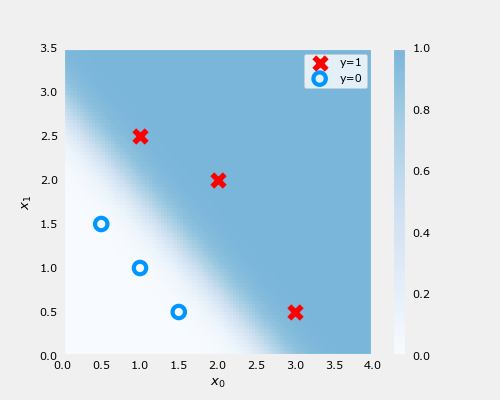

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plt_prob(ax, w_out, b_out)

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

